In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[337  20]
 [ 30 182]]


* 정확도

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y,y_pred)
print(acc)

* 정밀도

In [ ]:
from sklearn.metrics import precision_score
prec = precision_score(y,y_pred)
print(prec)

* 재현율

In [ ]:
from sklearn.metrics import recall_score
rec = recall_score(y,y_pred)
print(rec)

* F1 score

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y, y_pred)
print(f1)

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [4]:
from sklearn.preprocessing import Binarizer
y_proba = model_lor.predict_proba(X)[:,1]

binarizer = Binarizer(threshold = 0.1)
y_pred2 = binarizer.fit_transform(y_proba.reshape(-1,1)).ravel()

print(y_pred2[:10])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm2 = confusion_matrix(y, y_pred2)
acc2 = accuracy_score(y, y_pred2)
prec2 = precision_score(y, y_pred2)
rec2 = recall_score(y, y_pred2)
f12 = f1_score(y, y_pred2)

print(cm2)
print(acc2)
print(prec2)
print(rec2)
print(f12)

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


* ROC 곡선 시각화

In [6]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_proba)

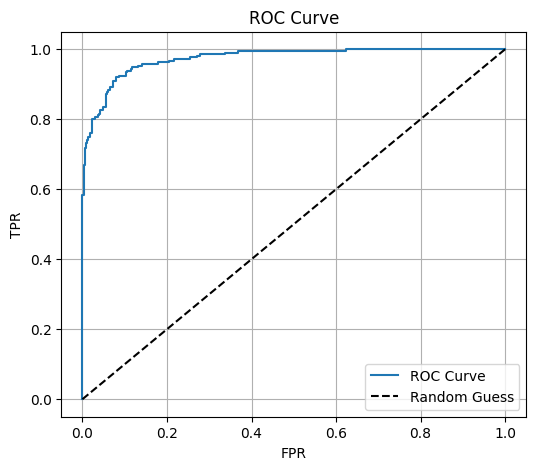

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.plot([0,1],[0,1],'k--', label='Random Guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

* ROC AUC 값

In [9]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y, y_pred)
print(roc_auc)

0.9012340785370753
